In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import collections
import seaborn as sns       # package for better viewing of networks
import operator 
from networkx.algorithms import community
from networkx.algorithms import hits
import networkx.algorithms.community
import re
from matplotlib import pyplot, patches
import scipy
from scipy import io
from scipy import sparse
import community     #from package python-louvain    #pip install python-louvain, reference: https://github.com/taynaud/python-louvain

/Users/iris/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


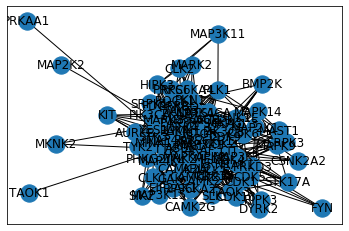

In [2]:
#import modules for building edge weighted networks
from EdgeWeightedNetworkBuilding import build_network_from_excel, build_network_from_df  

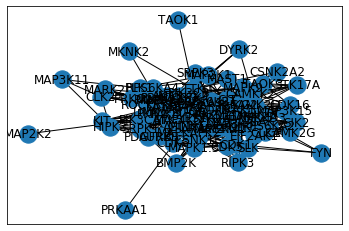

In [3]:
#build edge weighted network
df_getNetwork = build_network_from_excel(file_path = "/Users/iris/Documents/QMUL-2018/Individual_Project/coding/datasets/mcf7_ntera2_hl60_ksea.xlsm",key="MCF7", sheet_name = "zScorenodes.edges", threshold = 0.2)
cell_line = "MCF7"

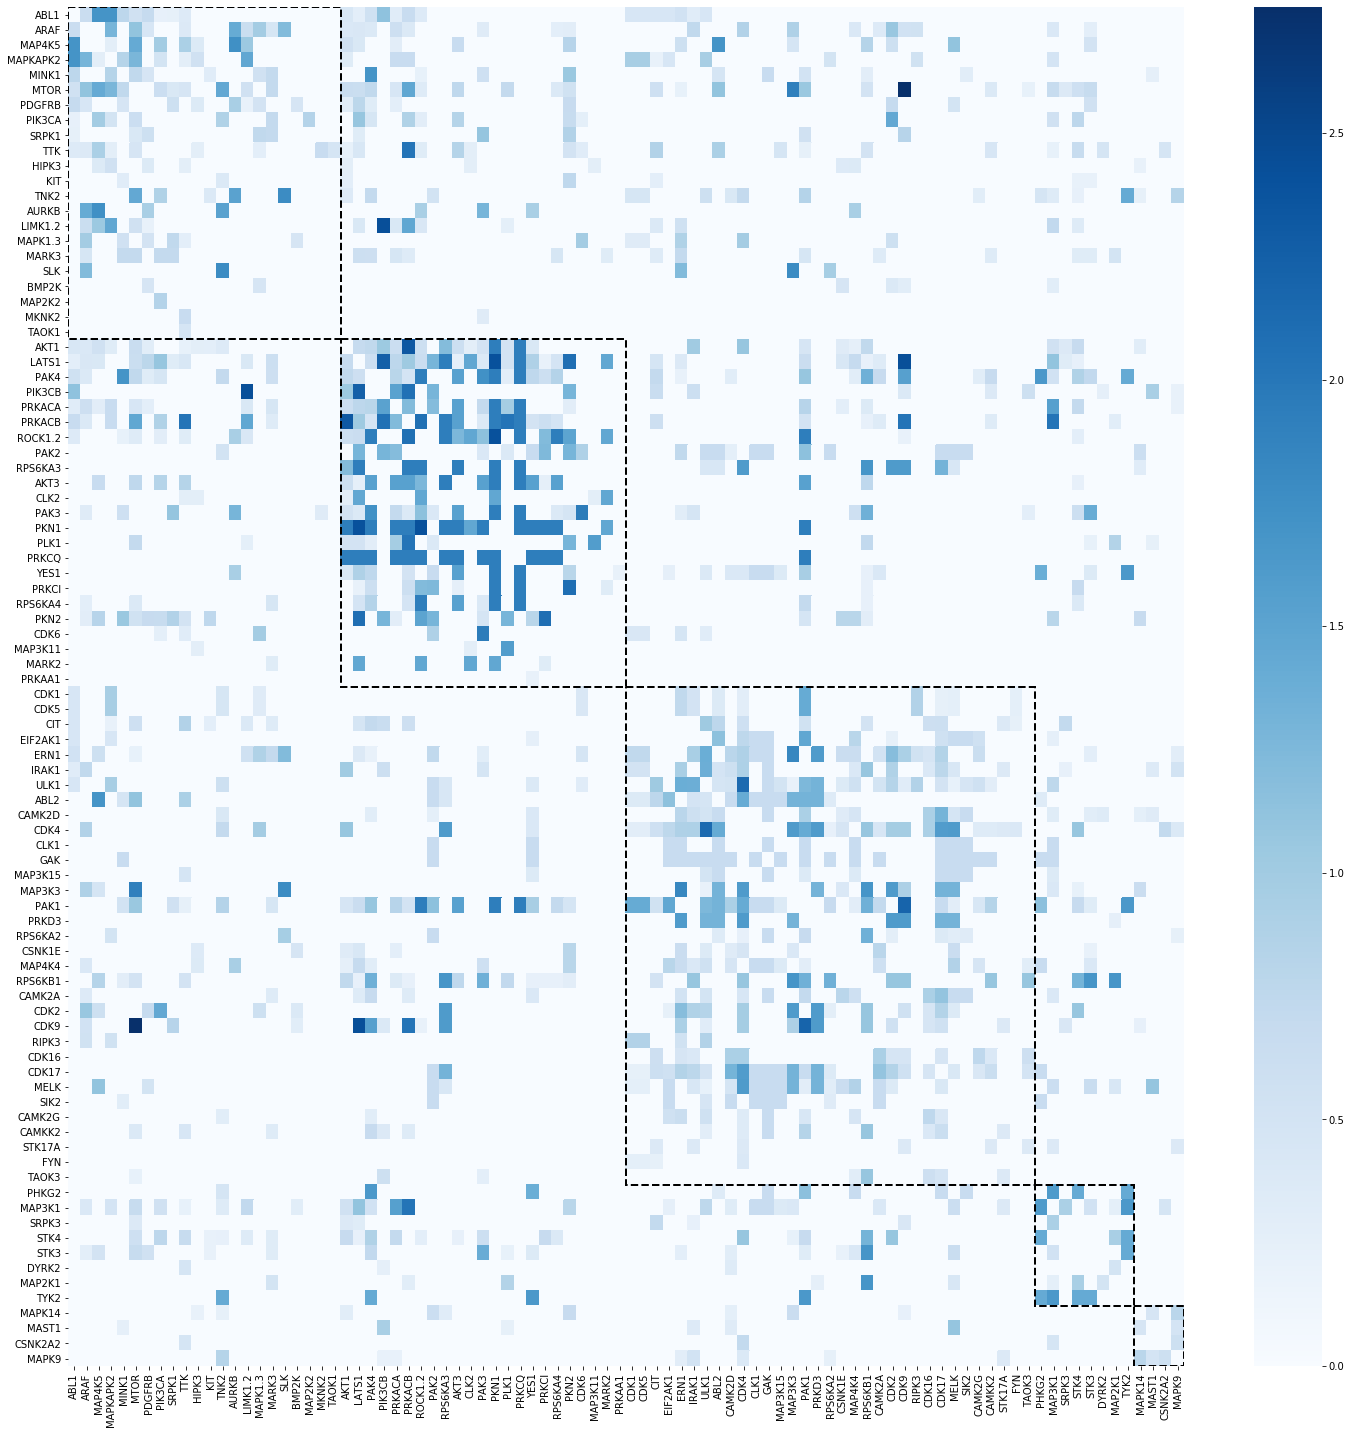

In [6]:
louvain_community_dict = community.best_partition(df_getNetwork, resolution=1.3)

louvain_comms=collections.defaultdict(list)

for node_index, comm_id in louvain_community_dict.items():
    louvain_comms[comm_id].append(node_index)
louvain_comms = louvain_comms.values()

nodes_louvain_ordered = [node for comm in louvain_comms for node in comm]

adjacency_matrix = nx.convert_matrix.to_pandas_adjacency(df_getNetwork,nodelist=nodes_louvain_ordered)

#Plot adjacency matrix in toned-down black and white
plt.figure(figsize=(25, 25))
sns.heatmap(adjacency_matrix,cmap="Blues")

partitions=[louvain_comms]
colors=["Black"]

assert len(partitions) == len(colors)
ax = plt.gca()
for partition, color in zip(partitions, colors):
    current_idx = 0
    for module in partition:
        ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                    len(module), # Width
                                    len(module), # Height
                                    facecolor="none",
                                    edgecolor=color,
                                    linestyle="--",
                                    linewidth="2"))
        current_idx += len(module)

plt.savefig("heatmap.svg",format="svg")
plt.savefig("heatmap.png",format="png")
plt.show()